## Essential Functions

In [24]:
# _____________________________________________________________________________________________________
# Function to plot a grayscale image
def plot_image(image):
    """
    Plot a grayscale image.

    Args:
    image (numpy.ndarray): The input image array.
    """
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")
# _____________________________________________________________________________________________________
# Function to plot a color image
def plot_color_image(image):
    """
    Plot a color image.

    Args:
    image (numpy.ndarray): The input color image array.
    """
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")
# _____________________________________________________________________________________________________
# Function to save the current figure.
import os # Importing the os module for operating system related functions
# Define the directory structure for saving figures
PROJECT_ROOT_DIR = "." # Define the project's root directory
CHAPTER_ID = "cnn" # Define the chapter ID (or directory name) for organization
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID) # Define the path where images will be saved by joining the project root, "images", and chapter ID
os.makedirs(IMAGES_PATH, exist_ok=True)# Create the directory specified by IMAGES_PATH if it doesn't already exist

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    Save the current figure.

    Args:
    fig_id (str): The filename (without extension) to save the figure as.
    tight_layout (bool, optional): Whether to apply tight layout. Default is True.
    fig_extension (str, optional): The file extension of the saved figure. Default is "png".
    resolution (int, optional): The resolution of the saved figure. Default is 300.
    """
    # Construct the full path for saving the figure
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    # Inform about the saving process
    print("Saving figure", fig_id)
    # Apply tight layout if specified
    if tight_layout:
        plt.tight_layout()
    # Save the figure with specified format and resolution
    plt.savefig(path, format=fig_extension, dpi=resolution)
# _____________________________________________________________________________________________________
# Function to crop a portion of the input images.
def crop(images):
    """
    Crop a portion of the input images.

    Args:
    images (numpy.ndarray): The input image array.

    Returns:
    numpy.ndarray: The cropped portion of the input images.
    """
    return images[150:220, 130:250]

# Convolutional layer

The convolutional layer is the key component of a CNN. 

* Unlike previous layers, neurons in the first convolutional layer are connected only to pixels within their receptive fields, not to every pixel in the input image. Neurons in subsequent layers are connected to a small rectangle of neurons in the preceding layer. 

* This hierarchical architecture enables the network to focus on small low-level features initially, gradually assembling them into larger higher-level features in subsequent layers. 

* This hierarchical structure mirrors real-world images, making CNNs highly effective for image recognition.

   Input Image         Convolutional Layer 1        Convolutional Layer 2
+-------------+           +-------------+             +-------------+
|             |           |             |             |             |
|   Neurons   |           |   Neurons   |             |   Neurons   |
|   connected |           |   connected |             |   connected |
|     to      |           |     to      |             |     to      |
|   pixels    |           |   small     |             |   small     |
|     in      |           |  rectangle  |             |  rectangle  |
| receptive   |           | in previous |             | in previous |
|   fields    |           |    layer    |             |    layer    |
|             |           |             |             |             |
+-------------+           +-------------+             +-------------+

  **Zero Padding:** A neuron positioned at row $i$, column $j$ within a specific layer receives inputs from neurons in the previous layer situated in rows $i$ to $i + f_h – 1$, and columns $j$ to $j + f_w – 1$. Here, $f$ represents the height and width of the receptive field. To maintain **consistency in layer dimensions** with the preceding layer, it's typical to append zeros around the inputs, as depicted in the diagram. This practice is commonly referred to as **zero padding**.

Neurons in Layer (i, j):        
+---+---+---+
|   |   |   |    
+---+---+---+
|   |   |   |    
+---+---+---+
|   |   |   |    
+---+---+---+

Layer (i, j) with Padding:
+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+
| 0 |   |   |   | 0 |
+---+---+---+---+---+
| 0 |   |   |   | 0 |
+---+---+---+---+---+
| 0 |   |   |   | 0 |
+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+

**Note:** It is also possible to connect a large input layer to a much smaller layer by **spacing out** the receptive fields.

* This dramatically reduces the model’s computational complexity. 

* The shift from one receptive field to the next is called the **stride**. 

* In the diagram, a $5 × 7$ input layer (plus zero padding) is connected to a $3 × 4$ layer, using 3 × 3 receptive fields and a **stride** of 2 (in this example the **stride** is the same in both directions, but it does not have to be so). 

* A neuron located in row $i$, column $j$ in the upper layer is connected to the outputs of the neurons in the previous layer located in rows $i × s_h$ to $i × s_h + f_h – 1$, columns $j × s_w$ to $j × s_w + f_w – 1$, where $s_w$ and $s_h$ are the vertical and horizontal strides.

Previous Layer (5x7):
+-+-+--+-+-+-+-+
|*|*|*#|#|#| | |
+-+-+--+-+-+-+-+
|*|*|*#|#|#| | |
+-+-+--+-+-+-+-+
|*|*|*#|#|#| | |
+-+-+--+-+-+-+-+
| | |  | | | | |
+-+-+--+-+-+-+-+
| | |  | | | | |
+-+-+--+-+-+-+-+

Upper Layer (3x4):
+-+-+-+-+-+-+
|*|#| | | | |
+-+-+-+-+-+-+
| | | | | | |
+-+-+-+-+-+-+
| | | | | | |
+-+-+-+-+-+-+

**Filters (convolution kernels)**: The filters are represented as small images the size of the receptive field. Each filter focuses on detecting specific patterns in the input data, such as vertical or horizontal lines. By convolving these filters over the input image, the CNN can identify important features.
* During training, the CNN learns to adjust the weights of these filters automatically to optimize performance for the given task. As a result, the network can learn to recognize complex patterns and features in the input data, leading to more accurate predictions.

Filters, also known as convolution kernels, are essential components of convolutional neural networks (CNNs) used in image processing tasks. They serve several crucial purposes:

* **Feature Extraction**: Filters are used to extract meaningful features from input data. These features represent patterns or characteristics present in the data that are relevant to the task at hand. For example, in image classification tasks, filters might detect edges, textures, shapes, or other visual patterns.

* **Dimensionality Reduction**: By applying filters to input data, CNNs can reduce the dimensionality of the data while preserving important information. This reduction in dimensionality helps in focusing on the most relevant features, making the subsequent processing more efficient.

**Example:** The initial filter is depicted as a black square containing a white vertical line at its center, essentially comprising a 7x7 matrix predominantly filled with zeros except for the central column, which is entirely occupied by ones. Neurons employing these weights will exclusively focus on the central vertical line within their receptive field, as inputs outside this line will be nullified due to multiplication by zero. Similarly, the second filter resembles a black square featuring a white horizontal line at its midpoint. Neurons utilizing these weights will solely attend to the central horizontal line within their receptive field, disregarding other inputs.

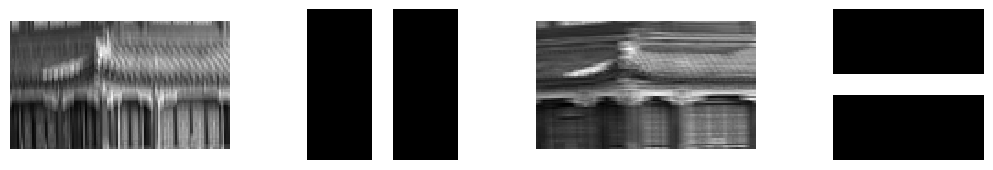

In [56]:
import numpy as np  # Importing NumPy library as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image  # Importing load_sample_image function from sklearn.datasets module

# Load sample images
''' Dividing images by 255 scales the pixel values to a range between 0 and 1. 
This normalization simplifies computation and ensures consistency across different 
datasets by standardizing pixel values, regardless of the original color depth. 
It's a common practice in image processing and machine learning to facilitate 
convergence during training and improve model performance.'''
china = load_sample_image("china.jpg") / 255  # Loading and normalizing the "china.jpg" image
flower = load_sample_image("flower.jpg") / 255  # Loading and normalizing the "flower.jpg" image
images = np.array([china, flower])  # Creating an array containing both images
''''
batch_size: This refers to the number of images in the dataset. 
height: It indicates the vertical size of the images in pixels, representing the number of rows.
width: It represents the horizontal size of the images in pixels, denoting the number of columns.
channels: It represent the image depth, indicating whether it's grayscale or colored. Grayscale images have one channel, while RGB images have three.'''
batch_size, height, width, channels = images.shape  # Retrieving dimensions of the images

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)  # Creating an array of zeros for filters with specified shape
filters[:, 3, :, 0] = 1  # Defining the first filter as a vertical line
filters[3, :, :, 1] = 1  # Defining the second filter as a horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")  # Performing convolution operation on the images using the defined filters
'''
tf.nn.conv2d: It's a TensorFlow function for 2D convolution, a core operation in CNNs where a filter is applied to an image to generate a feature map.
images: This is the input to the convolution operation. It is typically a tensor representing an image or a batch of images. 
filters: This represents the convolutional filters or kernels. These are smaller tensors applied to the input image to perform convolution. 
strides: This parameter specifies the stride of the convolution. It's an integer or a tuple of two integers, indicating the horizontal and vertical stride respectively. 
padding: This parameter controls how the convolution handles image borders. "SAME" padding ensures the output feature map matches the input image's dimensions by padding zeros around it.'''

plt.figure(figsize=(13, 9))  # Increase the values as needed for a larger image
for image_index in range(0,4,2):
    plt.subplot(4, 4, image_index+1)
    plot_image(crop(outputs[0, :, :, round(image_index/2)]))
    plt.subplot(4, 4, image_index+2)
    plot_image(filters[:, :, 0, round(image_index/2)])